# EDA 

### life cycle of machine learning project


###### understanding the problem statement
###### data collection
###### data checks to perform 
###### Exploratory data analysis
###### data pre-processing 
###### Model training 
###### choose best model

## 1) problem statement

###  this project understands how the student's performance (test scores) is affected by other variables such as gender , ethnicity , parental level of education , lunch and test preparation course

### 2) data collection 
##### data source :- kaggle
       

###   import data and required packages

In [39]:
# ! pip install seaborn

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings


import the csv data as  pandas Dataframe

In [41]:
df = pd.read_csv('data/stud.csv')

Showing few records in dataset

In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of data 

In [43]:
df.shape

(1000, 8)

checking missing values

In [44]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there are no missing values in the data set 

### check duplicates

In [45]:
df.duplicated().sum()

0

there is no duplicated vain the data set

### check data types

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### getting information about numeric data

In [47]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### check the number of unique values in each column

In [48]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [49]:
print("categories in 'gender' variable :   ",end="  ")
print(df['gender'].unique()) 

print("categories in 'race_ethnicity' variable :   ",end="  ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable :  ",end="  ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable :  ",end="  ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variable :  ",end="  ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable :     ['female' 'male']
categories in 'race_ethnicity' variable :     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable :    ['standard' 'free/reduced']
categories in 'test_preparation_course' variable :    ['none' 'completed']


In [50]:
# getting numeric & categorical column
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical feature : {}'.format(len(numeric_feature),numeric_feature))
print('we have {} categorical feature : {}'.format(len(categorical_feature),categorical_feature))


we have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding two columns Total_score and Average

In [51]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
reading_full_marks = df[df['reading_score']==100]['average'].count()
writing_score_marks = df[df['writing_score']==100]['average'].count()
math_score_marks = df[df['math_score']==100]['average'].count() 

print(f"Number of students with full marks in Maths: {math_score_marks}")
print(f"Number of students with full marks in writing_score: {writing_score_marks}")
print(f"Number of students with full marks in reading_score: {reading_full_marks}")

Number of students with full marks in Maths: 7
Number of students with full marks in writing_score: 14
Number of students with full marks in reading_score: 17


In [53]:
reading_less_marks = df[df['reading_score']<=20]['average'].count()
writing_less_marks = df[df['writing_score']<=20]['average'].count()
math_less_marks = df[df['math_score']<=20]['average'].count() 

print(f"Number of students with full marks in Maths: {reading_less_marks}")
print(f"Number of students with full marks in writing_score: {writing_less_marks}")
print(f"Number of students with full marks in reading_score: {math_less_marks}")

Number of students with full marks in Maths: 1
Number of students with full marks in writing_score: 3
Number of students with full marks in reading_score: 4


#### Insights from above two obsevation 
##### 1) students who scores full marks
##### 2) students who scores less then 20 marks

### Exploring data (Visualization)

##### Visualize average score distribution to make some conclusion

###### . histogram
###### . Kernel distribution function (KDF)

<Axes: xlabel='average', ylabel='Count'>

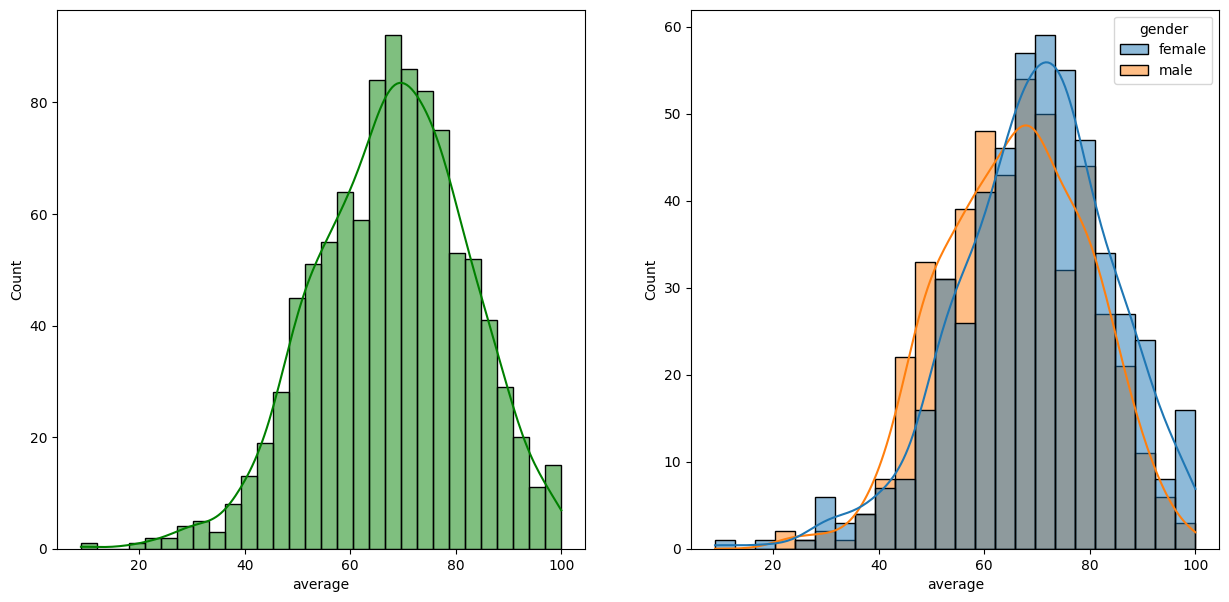

In [54]:
fig , axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

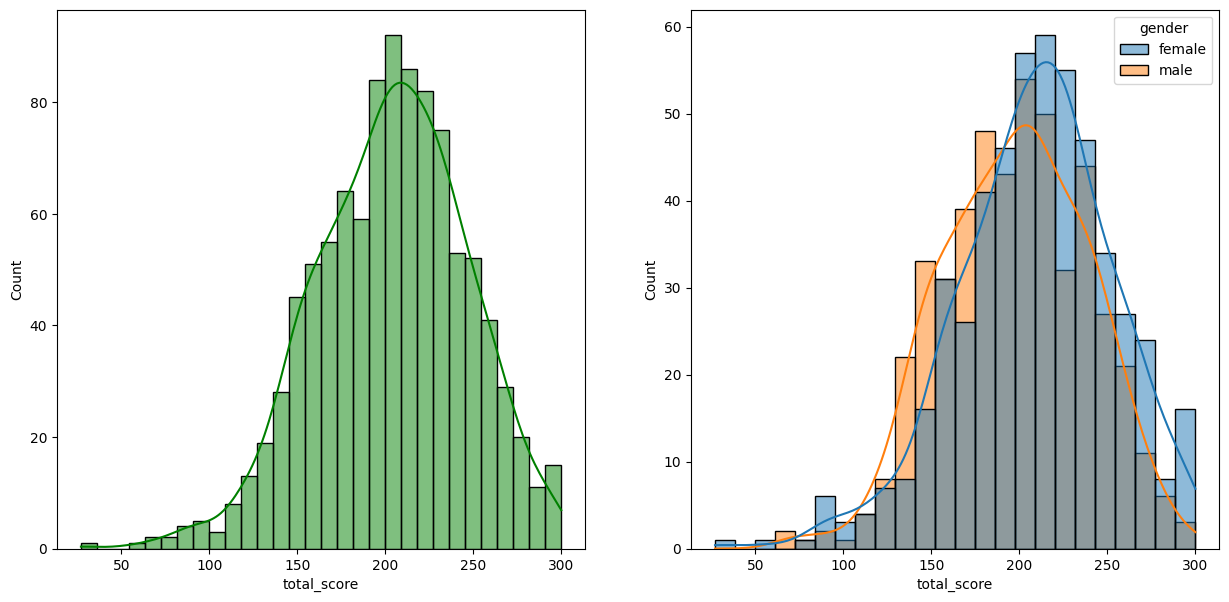

In [55]:
fig , axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')

### Insights

##### Female students tend to perform well then male students

distribution according  to race_ethnicity

<Axes: xlabel='count', ylabel='race_ethnicity'>

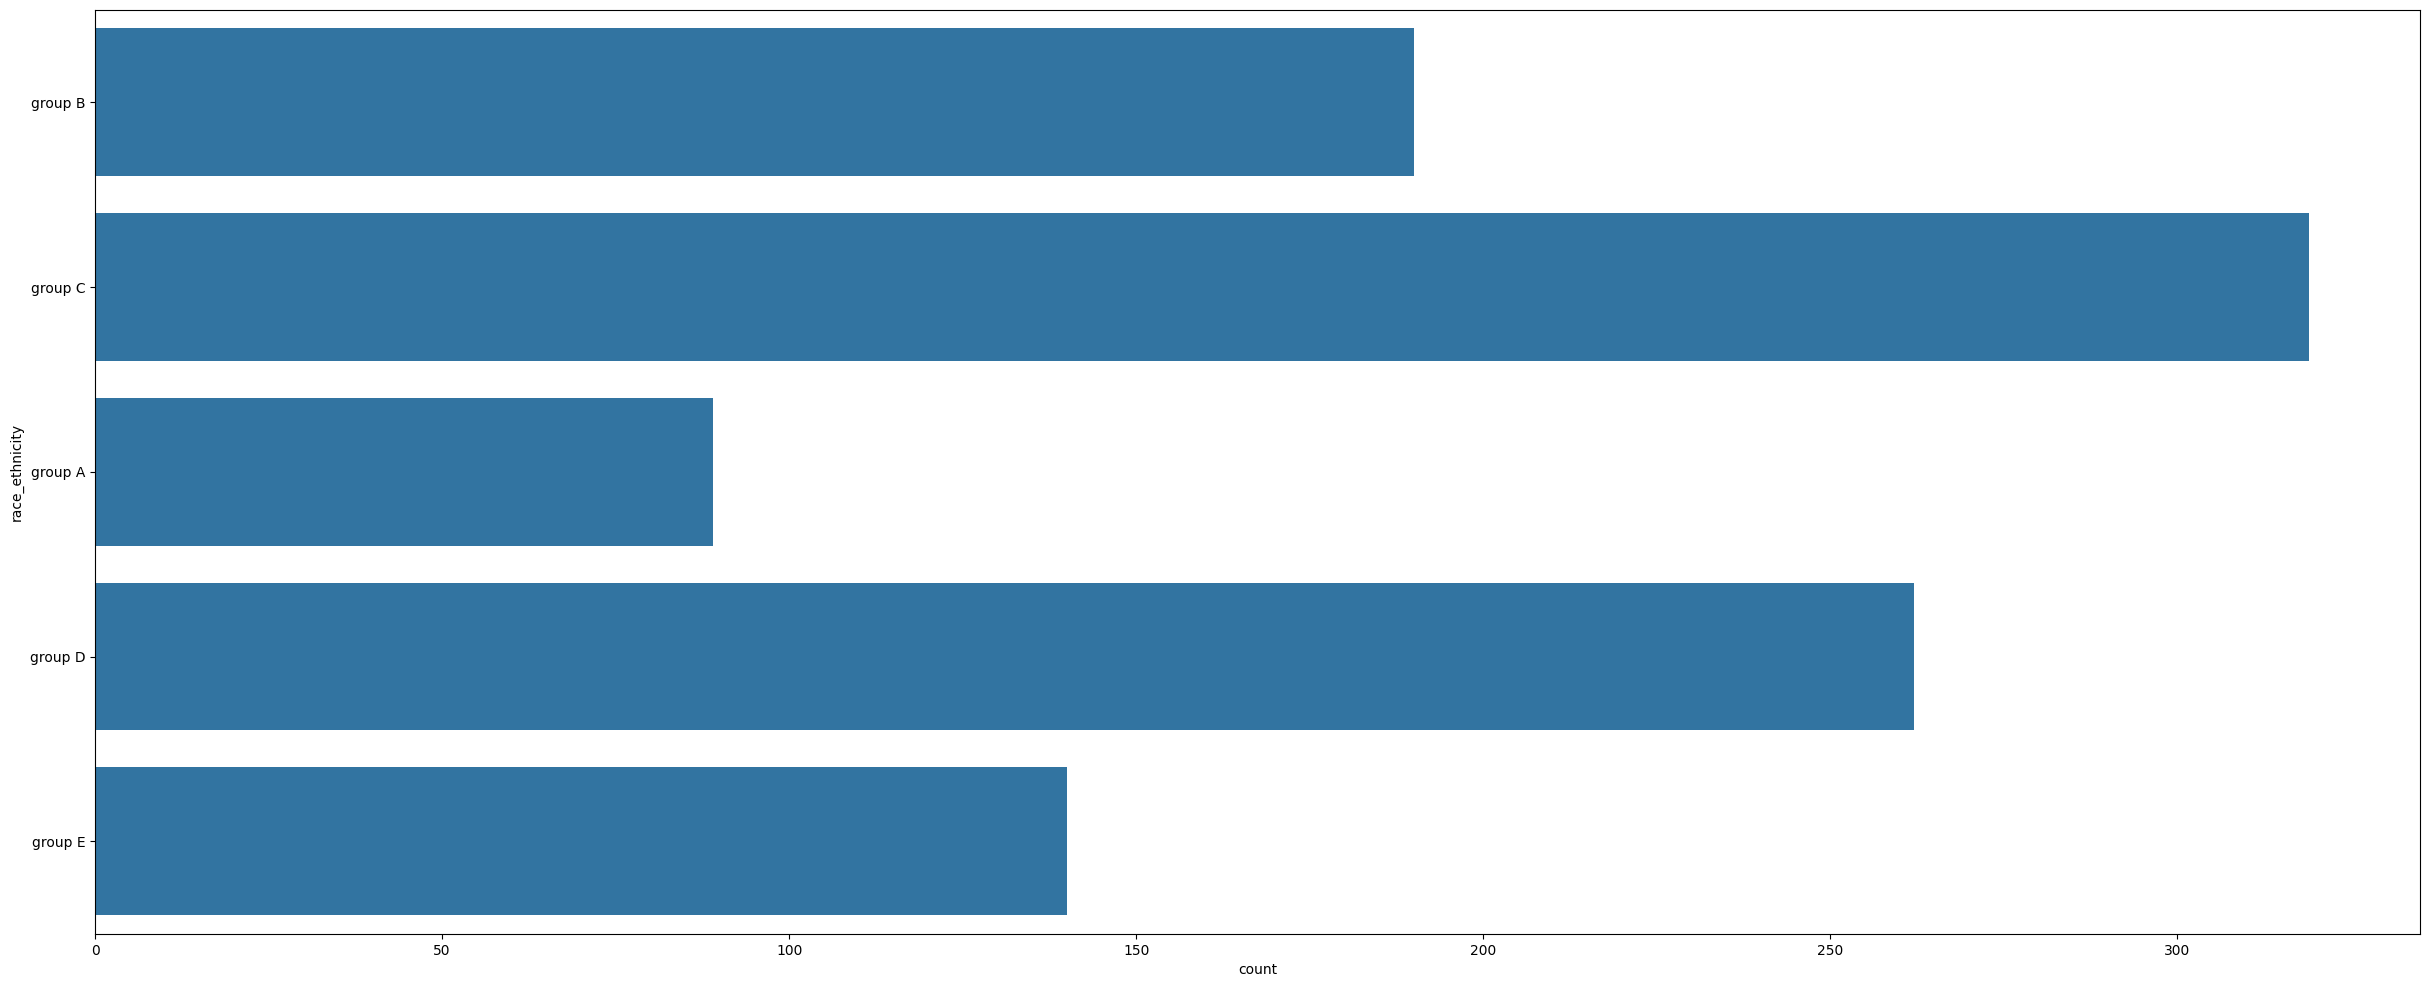

In [56]:
sns.countplot(data = df['race_ethnicity'] ) 


<Axes: xlabel='count', ylabel='gender'>

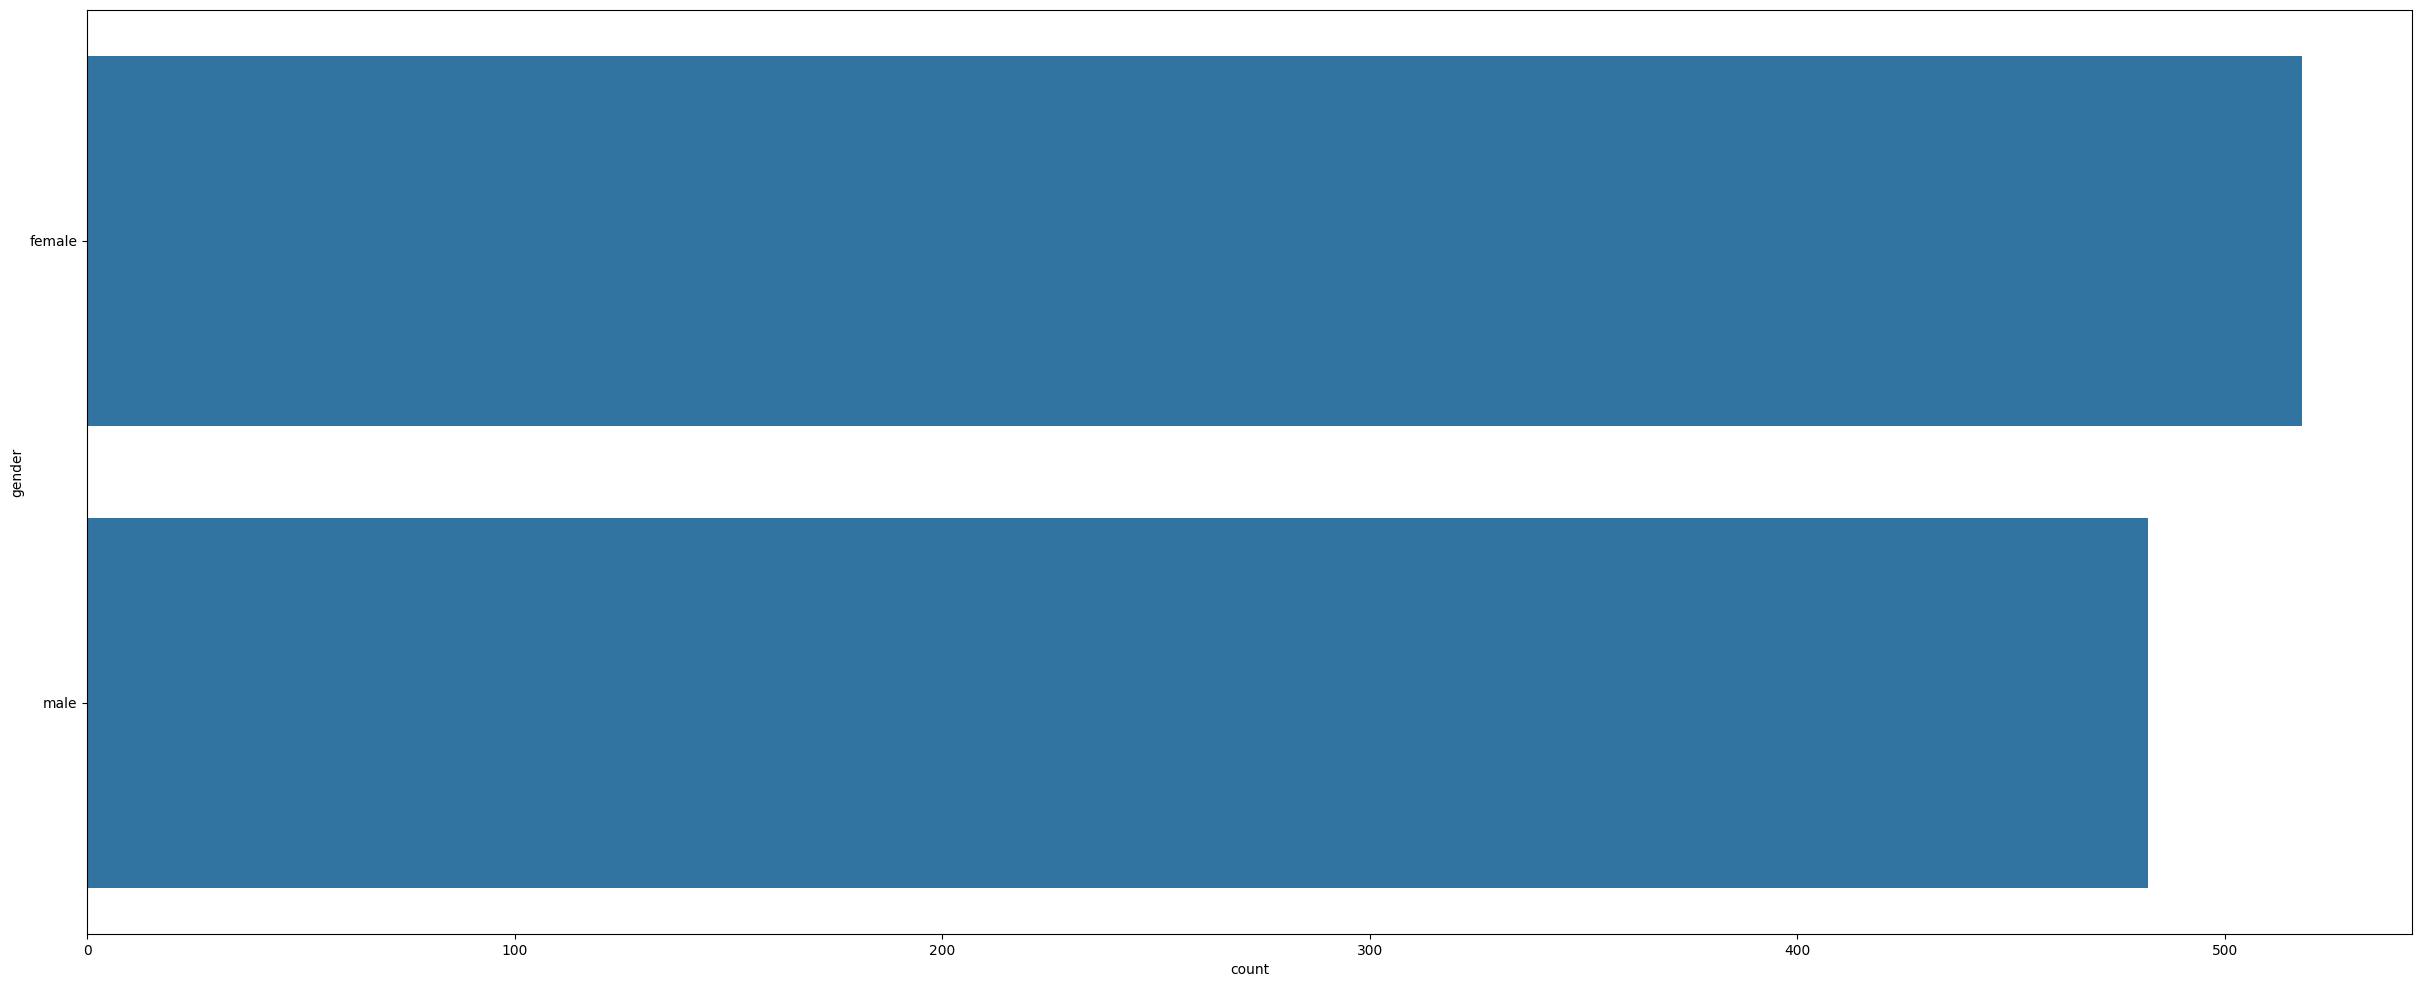

In [57]:
sns.countplot(data=df['gender'])

C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\3382387801.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\3382387801.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\3382387801.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


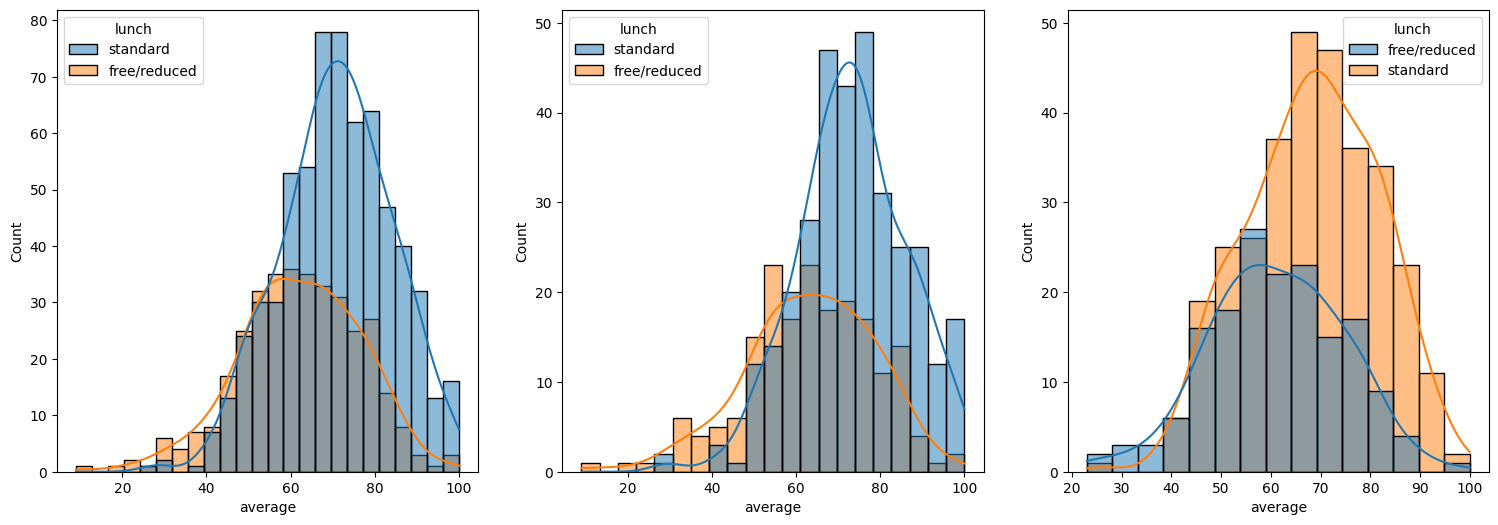

In [58]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights
#### Standard lunch helps perform well in exams.
#### Standard lunch helps perform well in exams be it a male or a female.

C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\2947585717.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\2947585717.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\2947585717.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


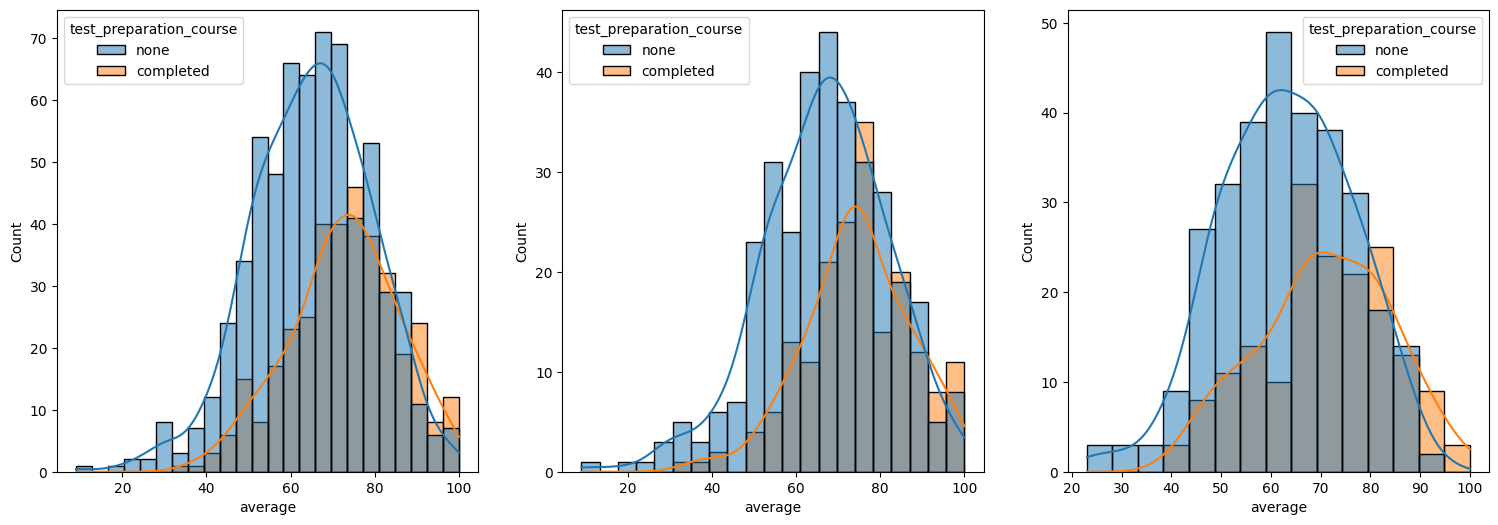

In [59]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test_preparation_course')
plt.show()

here we can conclude data student who's averge marks are gearter than 70 have completed test perparation course and scores well

C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\4276229179.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\4276229179.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\4276229179.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


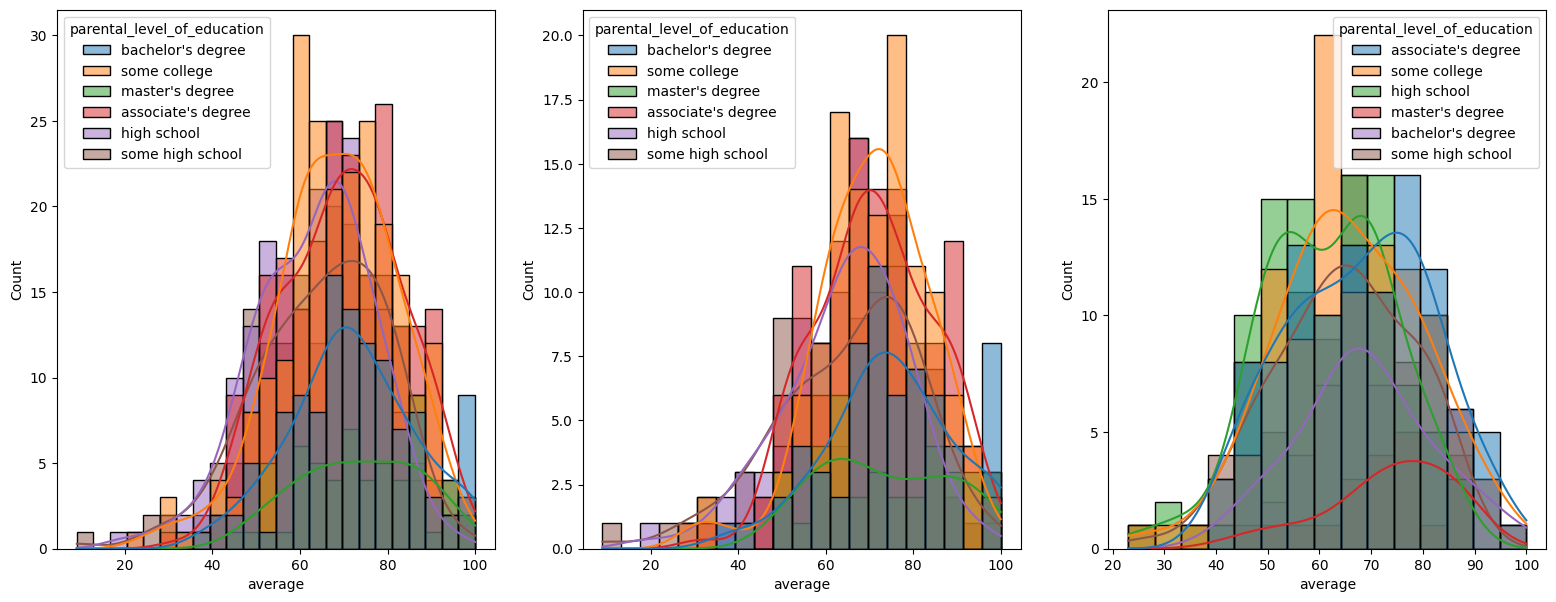

In [60]:
plt.subplots(1,3,figsize=(26,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\654521523.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\654521523.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\654521523.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


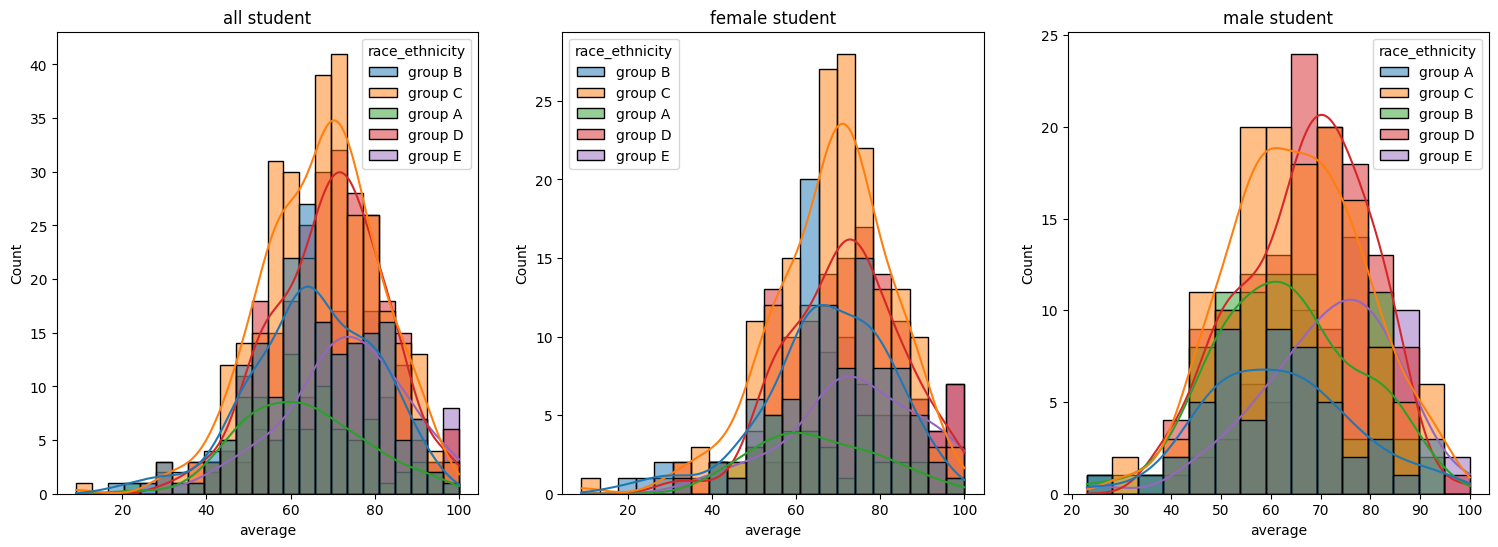

In [61]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.title("all student")

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title('female student')


plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title('male student')


plt.show()

###  Insight
Students of group A and group B tends to perform poorly in exam.



Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

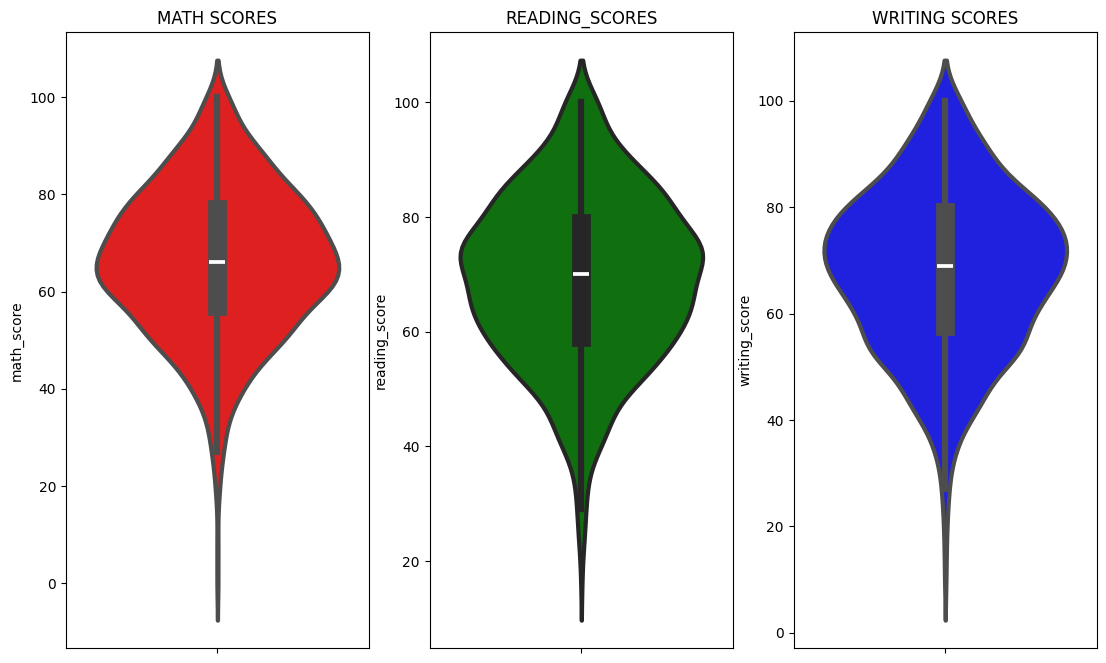

In [62]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='r',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING_SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

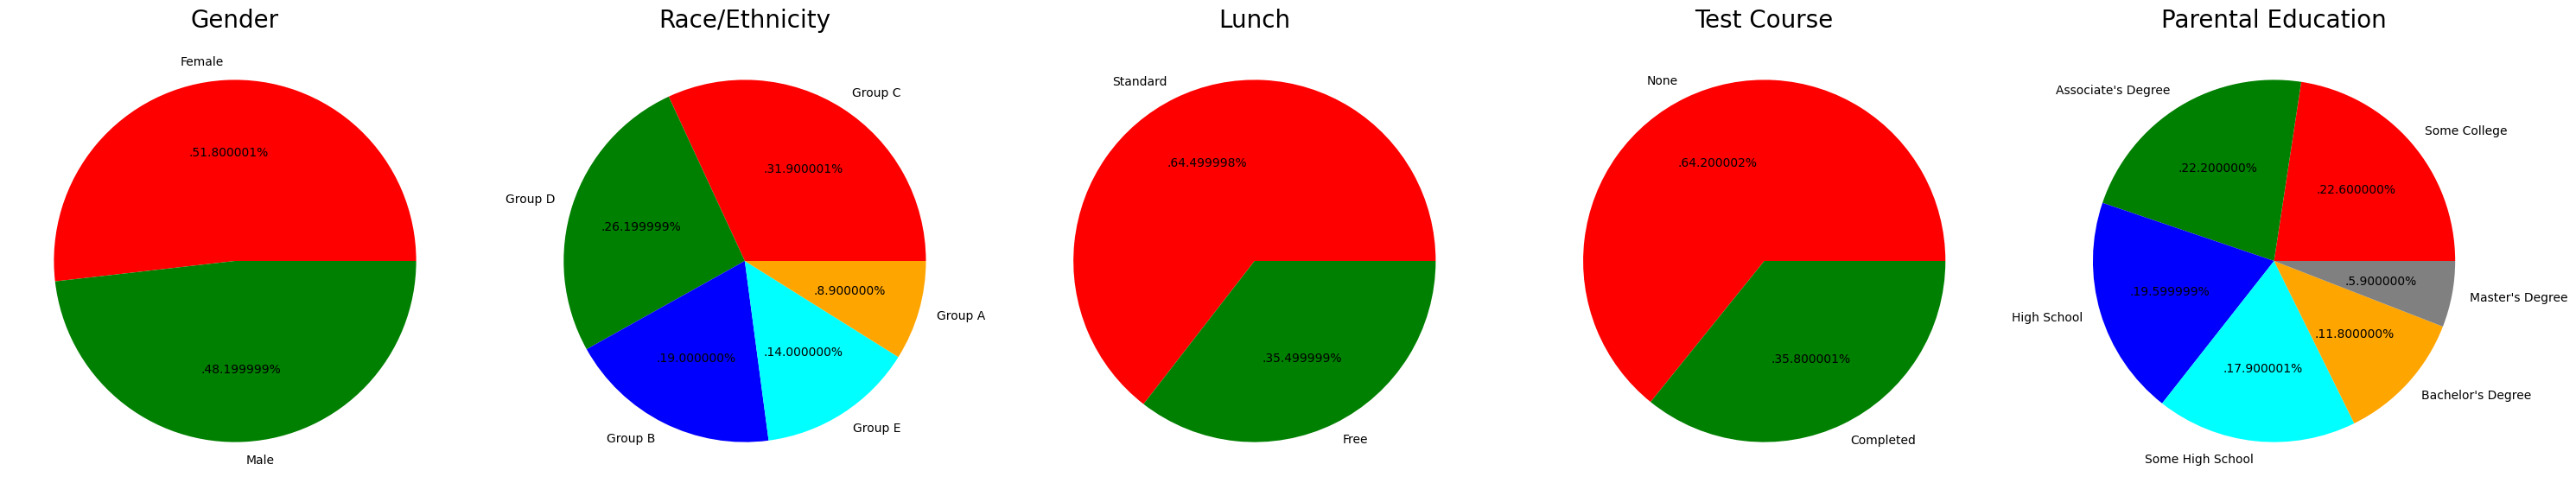

In [63]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insigths

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### Feature Wise Visualization

##### GENDER COLUMN
How is distribution of Gender ?

Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


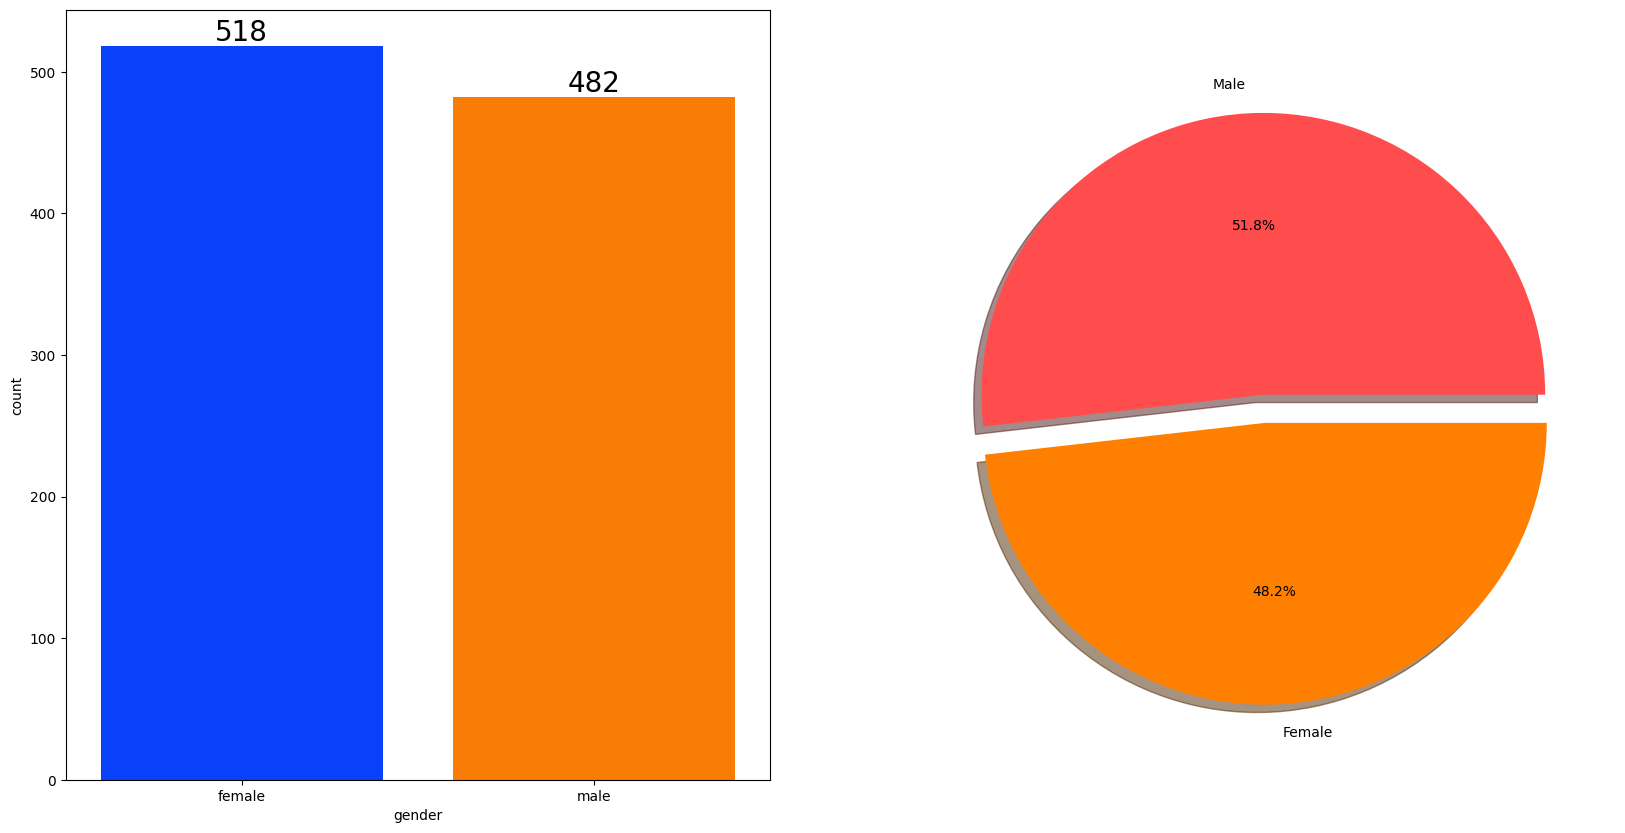

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### RACE/EHNICITY COLUMN
How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\1863224855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)


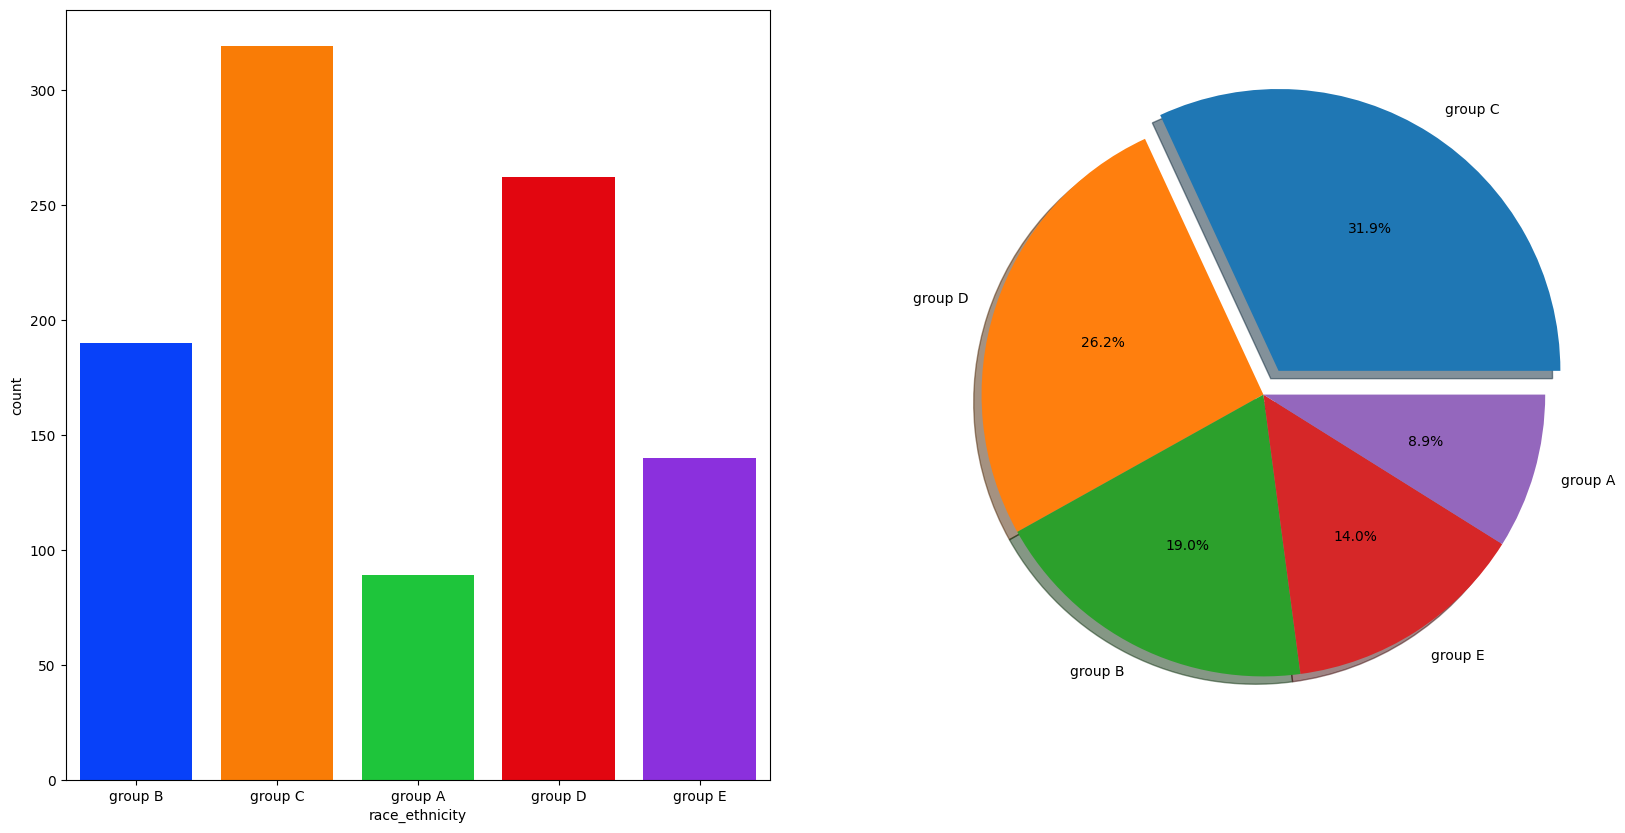

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
#for container in ax[0].containers:
 #   ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights

Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\1456866731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\1456866731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\1456866731.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False

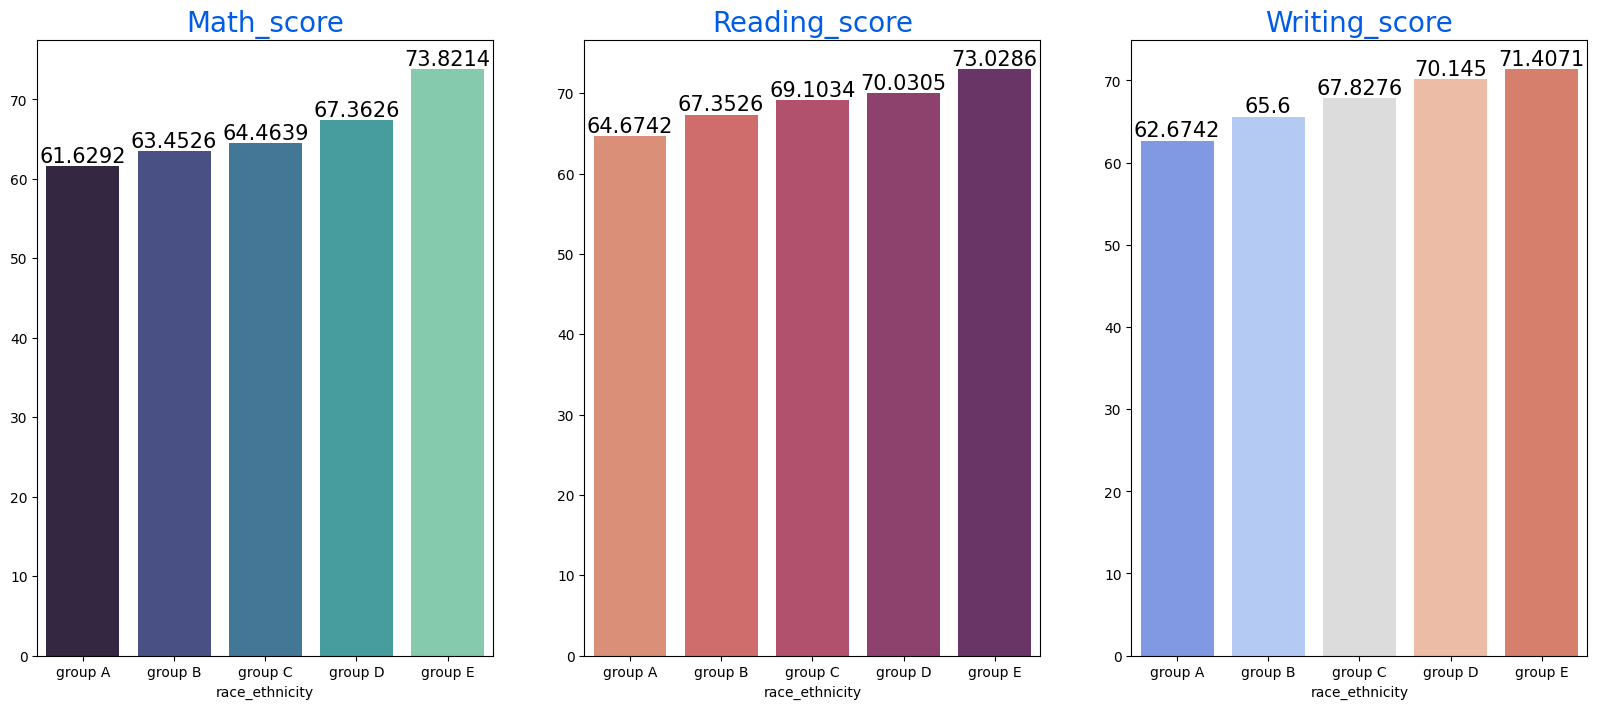

In [76]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

#### PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

C:\Users\Bhalchandra\AppData\Local\Temp\ipykernel_20264\2812551247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental_level_of_education'], palette = 'Blues')


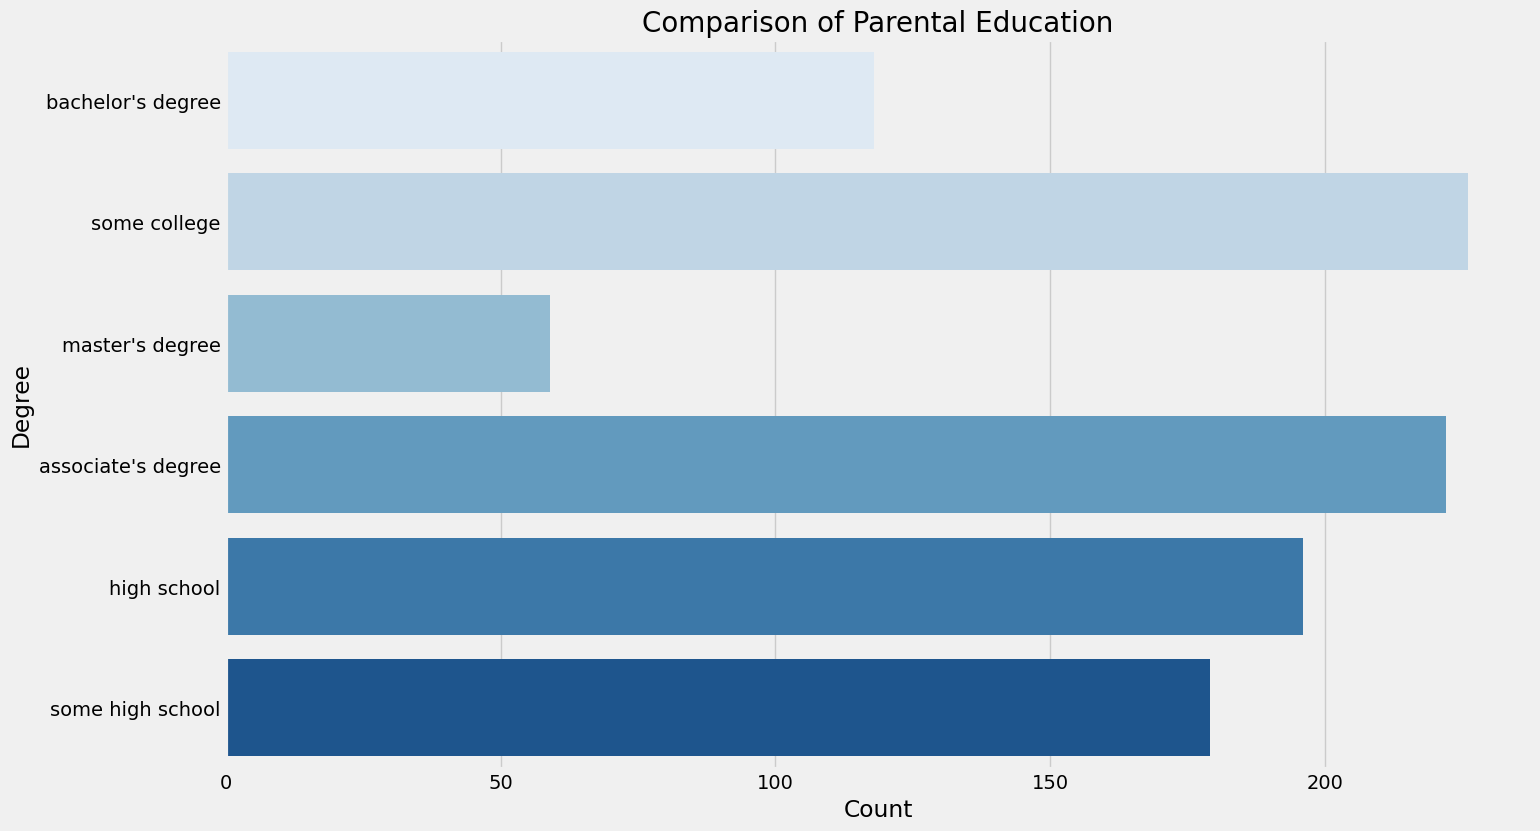

In [79]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

### Insights
Largest number of parents are from some college.

### MUTIVARIATE ANALYSIS USING PAIRPLOT

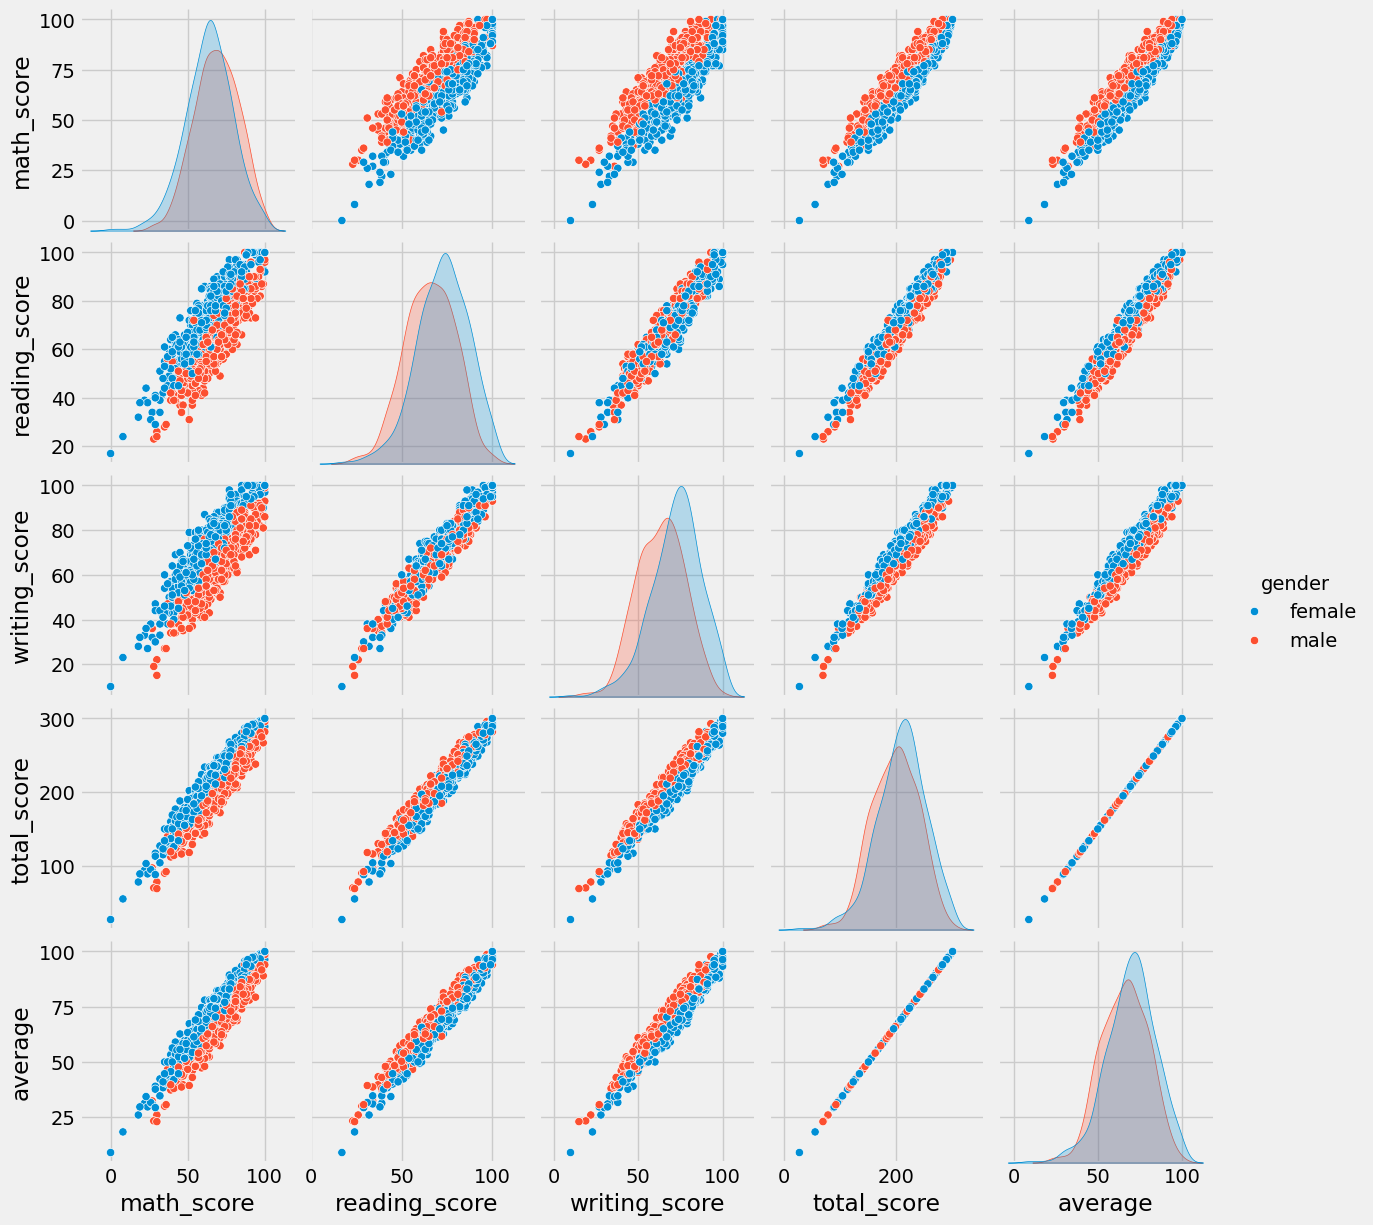

In [83]:

sns.pairplot(df,hue = 'gender')
plt.show()

### Insigths

From the above plot it is clear that all the scores increase linearly with each other

### Conclusions
Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.